# Explore your YouTube History

## Prepare data

In [17]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from preparation import prepare_data
from select_by_date_interval import select_by_date_interval
from plotting import h_bar_plot, get_videos_per_h, month_bar_plot, get_videos_per_month, stacked_bar_with_labels

In [18]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger
style.use('seaborn') # apply style for your plot. Hard to read letters in pie charts if style isn't suitable

In [19]:
PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)

start_date = "2023-01-01"
# end_date = "2022-11-01"
df = select_by_date_interval(df, start=start_date)
# df = df.loc[df["app"] == "YouTube Music"] # if you wanna work only with YT Music data
df

,video_title,channel_name,time,app
1,Жбурляю,Харцизи,2023-04-04 14:59:28.805000+03:00,YouTube Music
2,Ліхтар,Rohata Zhaba,2023-04-04 14:25:11.177000+03:00,YouTube
3,Drinker's Chasers - ANOTHER Rey Skywalker Movie?!,Critical Drinker After Hours,2023-04-04 14:12:17.193000+03:00,YouTube
4,Test Your English Vocabulary: SHAPES & PATTERNS,Learn English with Gill · engVid,2023-04-04 14:06:00.179000+03:00,YouTube
5,Finland joins NATO in historic shift prompted ...,FRANCE 24 English,2023-04-04 14:02:41.452000+03:00,YouTube
...,...,...,...,...
4391,Assassin's Creed Odyssey - Before You Buy,gameranx,2023-01-01 10:02:05.355000+02:00,YouTube
4392,#Ukraine's spy chief tells ABC News there will...,ABC News,2023-01-01 09:44:58.841000+02:00,YouTube
4393,Russian missile zooms over Kyiv before being s...,The Sun,2023-01-01 09:43:07.927000+02:00,YouTube
4394,YARMAK FT. TOF - МОЯ КРАЇНА,Yarmak Music,2023-01-01 00:07:14.838000+02:00,YouTube


# Figures that require all the available data

### Discover at what hours you watch a particular channel 

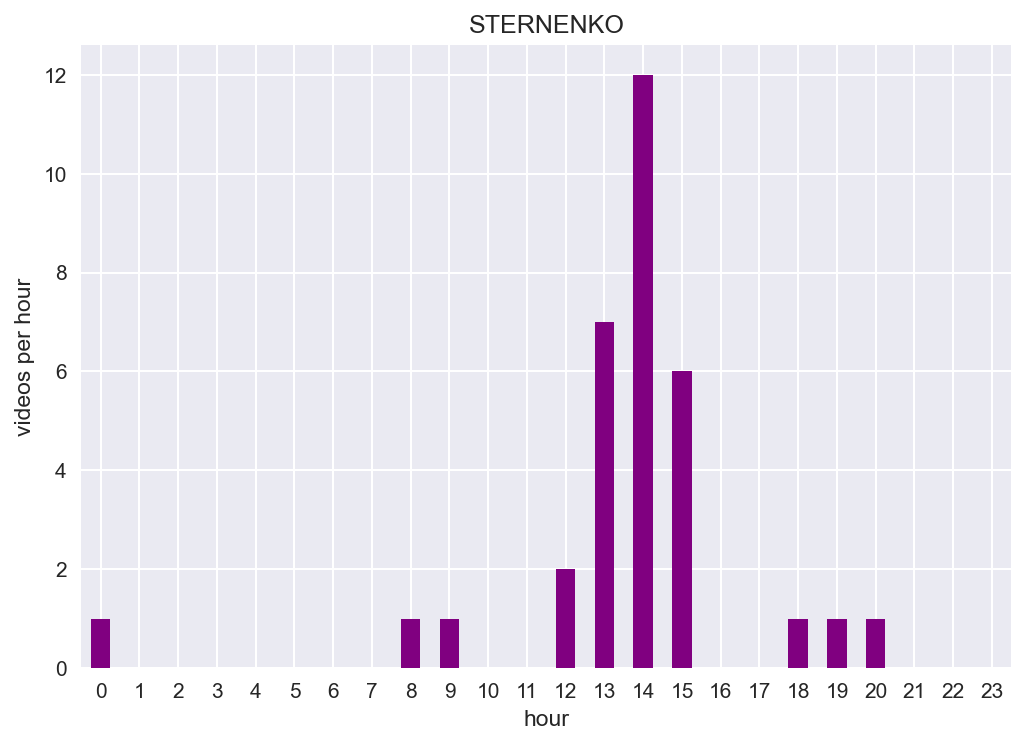

In [20]:
channel_name_to_look = "STERNENKO"
h_bar_plot(df, channel_name_to_look)

### Change in use of a particular channel over months (Use all data for this!)

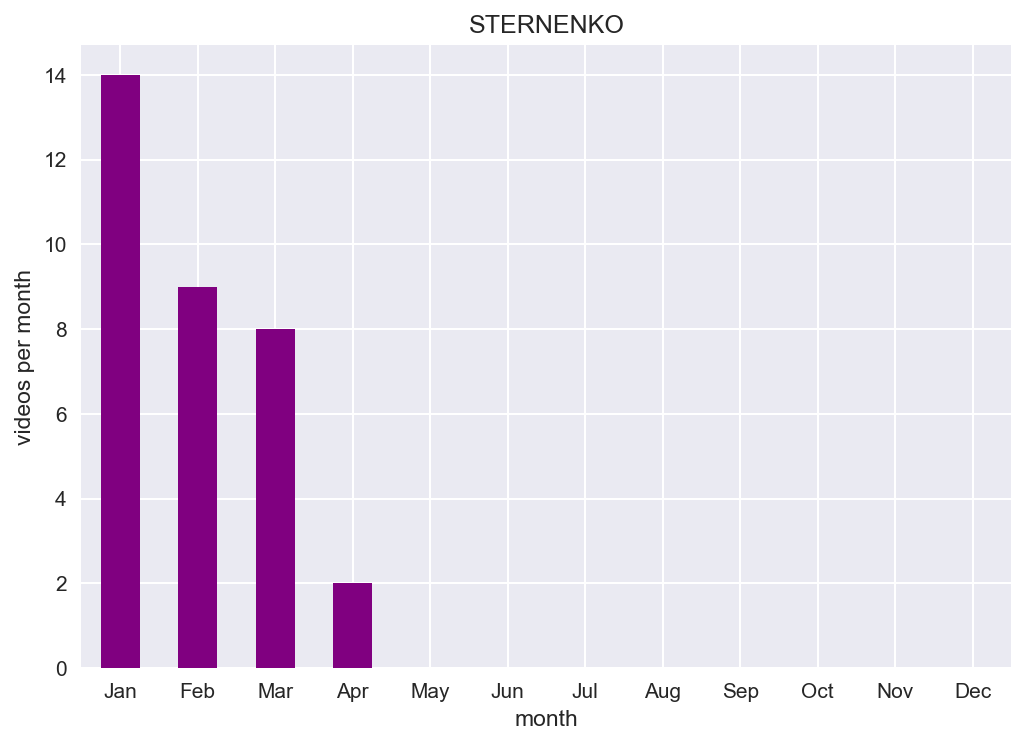

In [21]:
channel_name = "STERNENKO"
month_bar_plot(df, channel_name)

### See how many videos you watched/listened to in YT and YT music over months

In [22]:
yt_df = df.loc[df["app"] == "YouTube"]
yt = get_videos_per_month(yt_df)
music_df = df.loc[df["app"] == "YouTube Music"]
music = get_videos_per_month(music_df)

months = yt.index.tolist()
yt_use_progress = pd.DataFrame({"YT": yt, "YT Music": music}, index=months) 

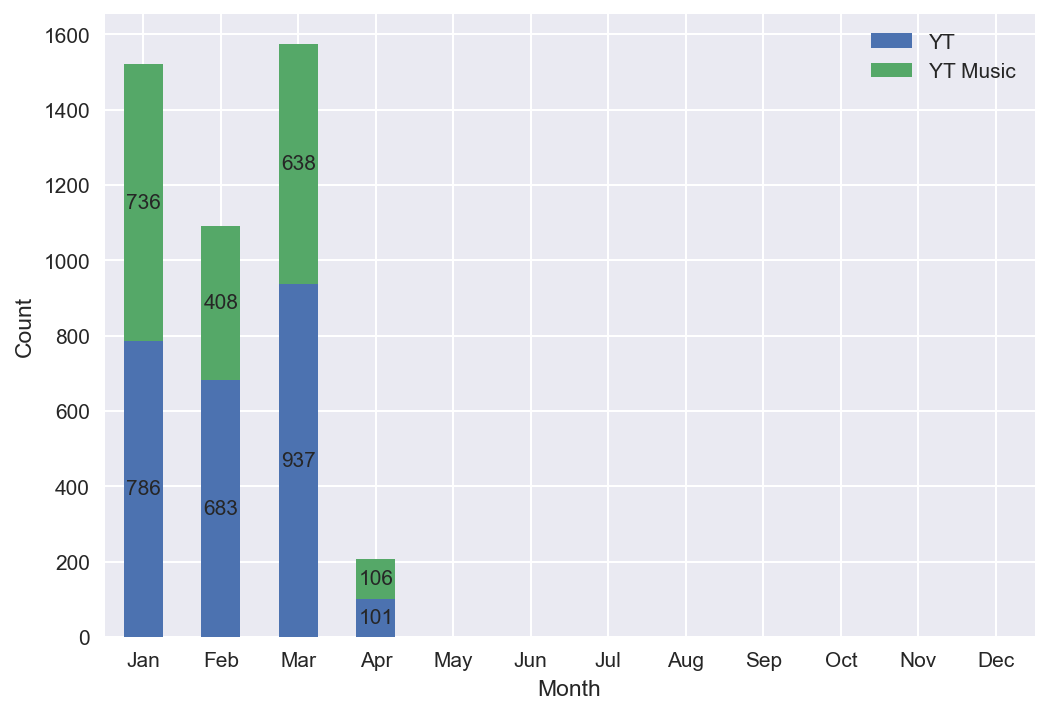

In [23]:
stacked_bar_with_labels(yt_use_progress[["YT", "YT Music"]])

### See how your use of YT music changed in percentages over months

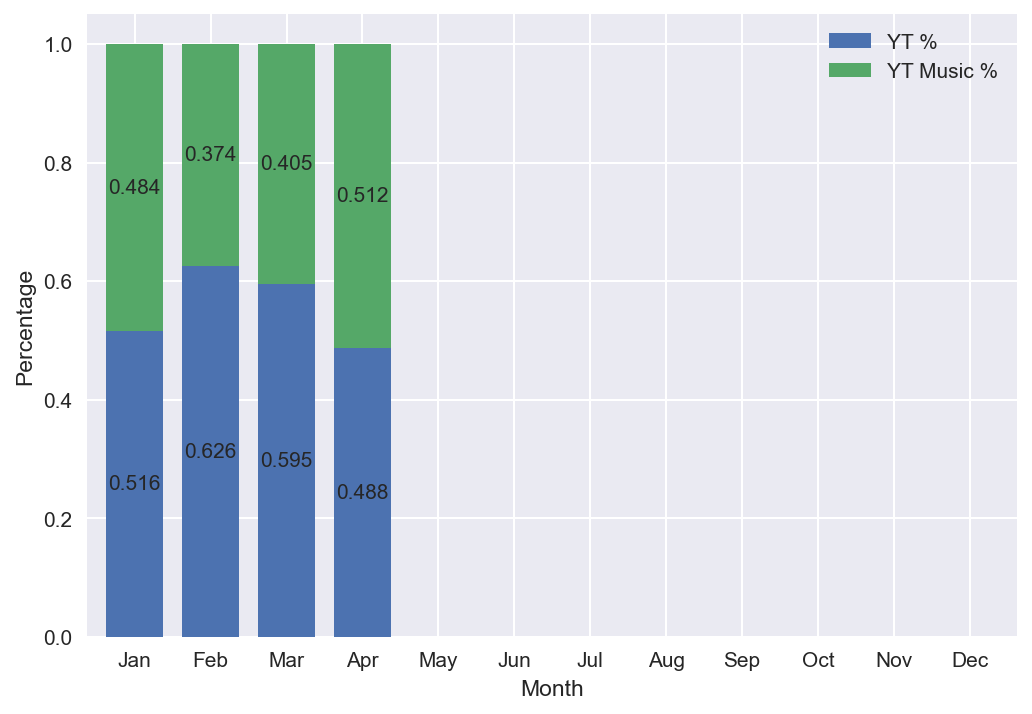

In [24]:
yt_use_progress["Total"] = yt_use_progress["YT"] + yt_use_progress["YT Music"]
yt_use_progress["YT %"] = yt_use_progress["YT"] / yt_use_progress["Total"]
yt_use_progress["YT Music %"] = yt_use_progress["YT Music"] / yt_use_progress["Total"]
yt_use_progress = yt_use_progress.round(3) # round all floats in df to 3 places

stacked_bar_with_labels(yt_use_progress[["YT %", "YT Music %"]], float_num=True, bar_width=0.75)

# Plots that don't need all the data

### Count on how many videos you clicked per channel

In [25]:
counts = df["channel_name"].value_counts()
counts

SadSvit                 118
Riffmaster              115
Grandma's Smuzi          99
Miss Monique             99
Цензор.НЕТ               74
                       ... 
Oceaniz                   1
CortoMaltese86            1
BlauweBarry               1
DylanBurnsTV              1
Oleksandr Ponomariov      1
Name: channel_name, Length: 839, dtype: Int64

### Break into categories

In [26]:
bins = [0, 1, 5, 10, 20, 50, np.inf]
names = ['1', '2-5', '6-10', '11-20', '21-50', ">50"]

intervals = pd.cut(counts, bins, labels=names)
# Use reindex here, so values get ordered by labels not count
videos_per_interval_count = intervals.value_counts().reindex(names)
videos_per_interval_percentage = videos_per_interval_count/len(intervals)
videos_per_interval_count, videos_per_interval_percentage

(1        482
 2-5      198
 6-10      58
 11-20     45
 21-50     44
 >50       12
 Name: channel_name, dtype: int64,
 1        0.574493
 2-5      0.235995
 6-10     0.069130
 11-20    0.053635
 21-50    0.052443
 >50      0.014303
 Name: channel_name, dtype: float64)

### Plot percentage of categories

<AxesSubplot:title={'center':'Videos per channel'}>

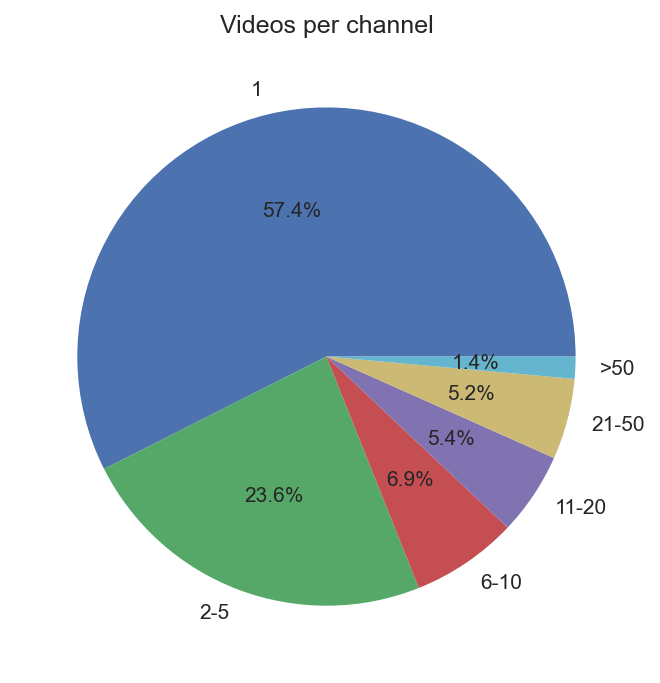

In [27]:
videos_per_interval_percentage.plot.pie(autopct='%1.1f%%',
                                        title="Videos per channel",
                                        ylabel="")

### Plot n most watched channels

1461

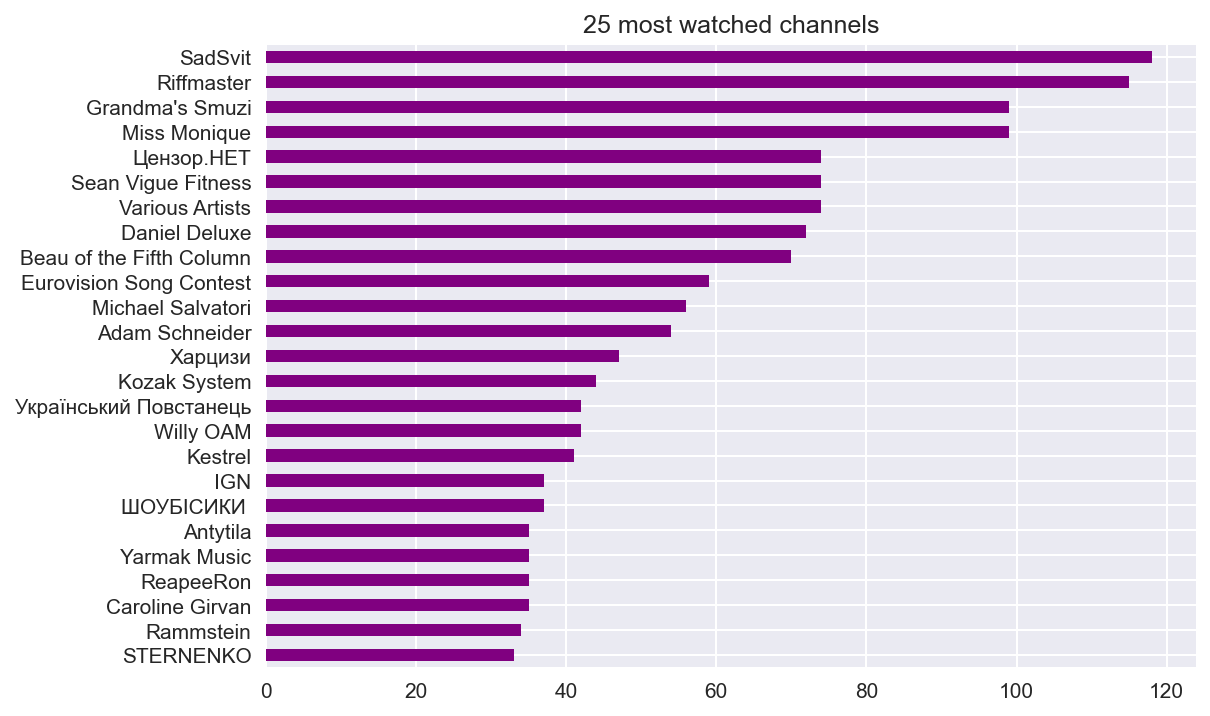

In [28]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()
sum(top_n_channels)

### Count on how many videos you clicked per hour

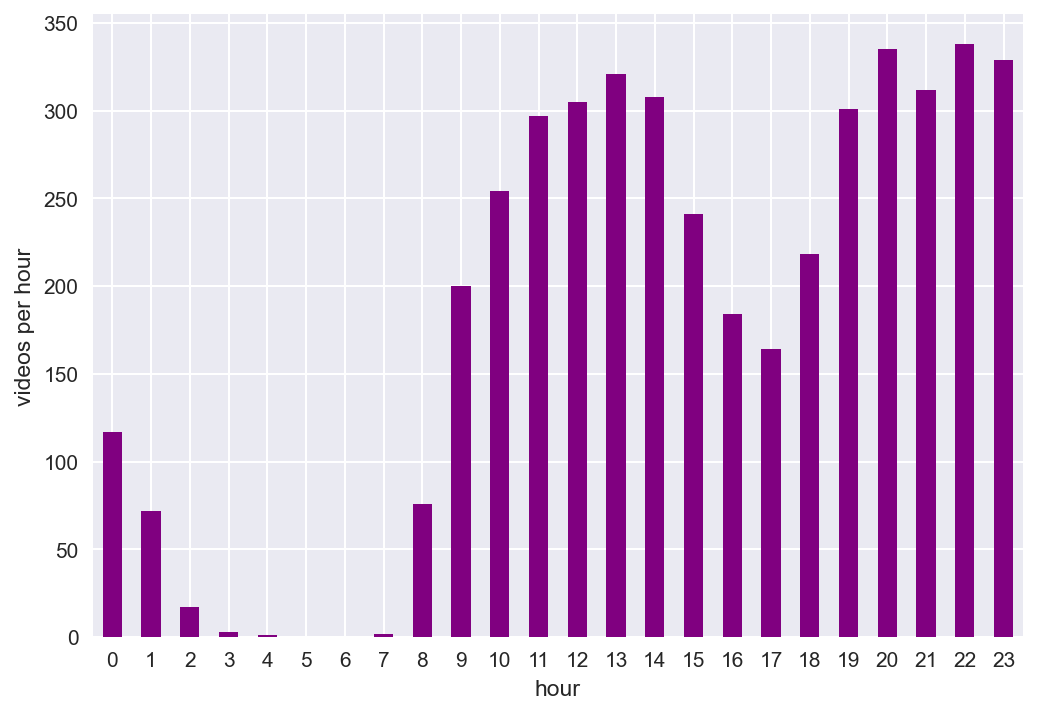

In [29]:
h_bar_plot(df)

### Plot videos count per hour for several channels

In [30]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels[:10]

['SadSvit',
 'Riffmaster',
 "Grandma's Smuzi",
 'Miss Monique',
 'Цензор.НЕТ',
 'Sean Vigue Fitness',
 'Various Artists',
 'Daniel Deluxe',
 'Beau of the Fifth Column',
 'Eurovision Song Contest']

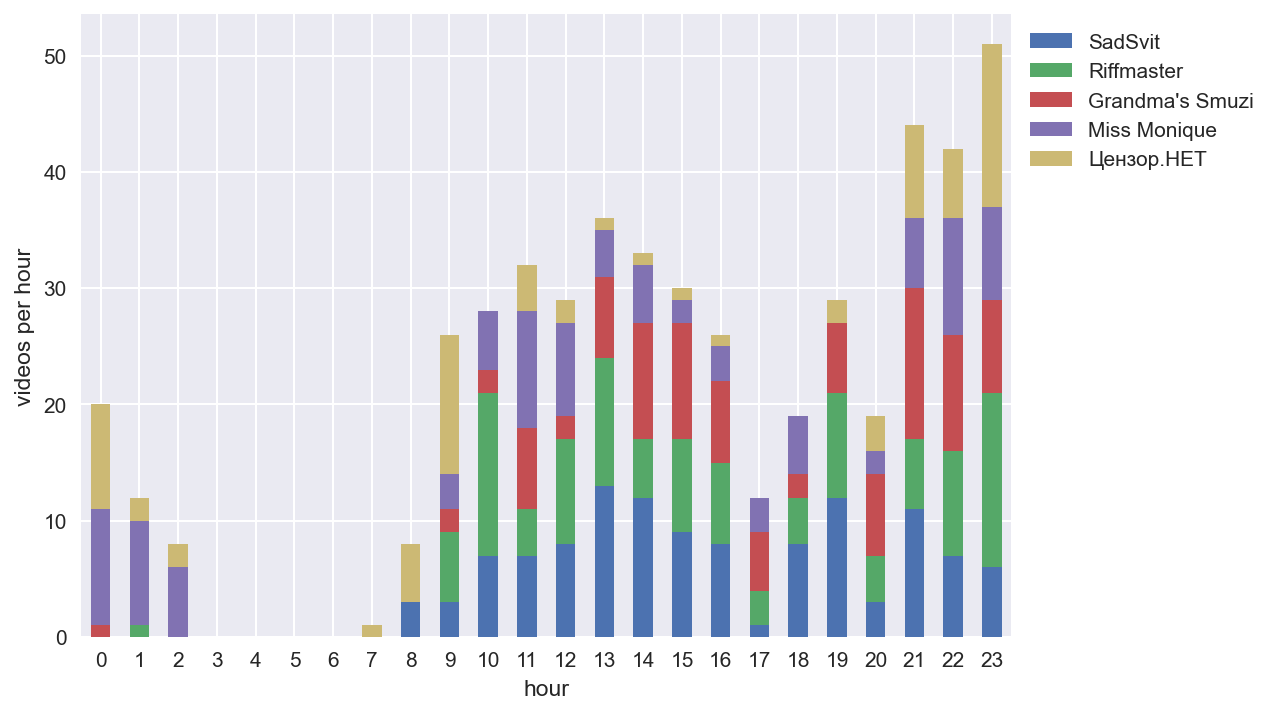

In [31]:
start_point = 0
interval = 5
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

### Count how many videos you click per day of week

<AxesSubplot:>

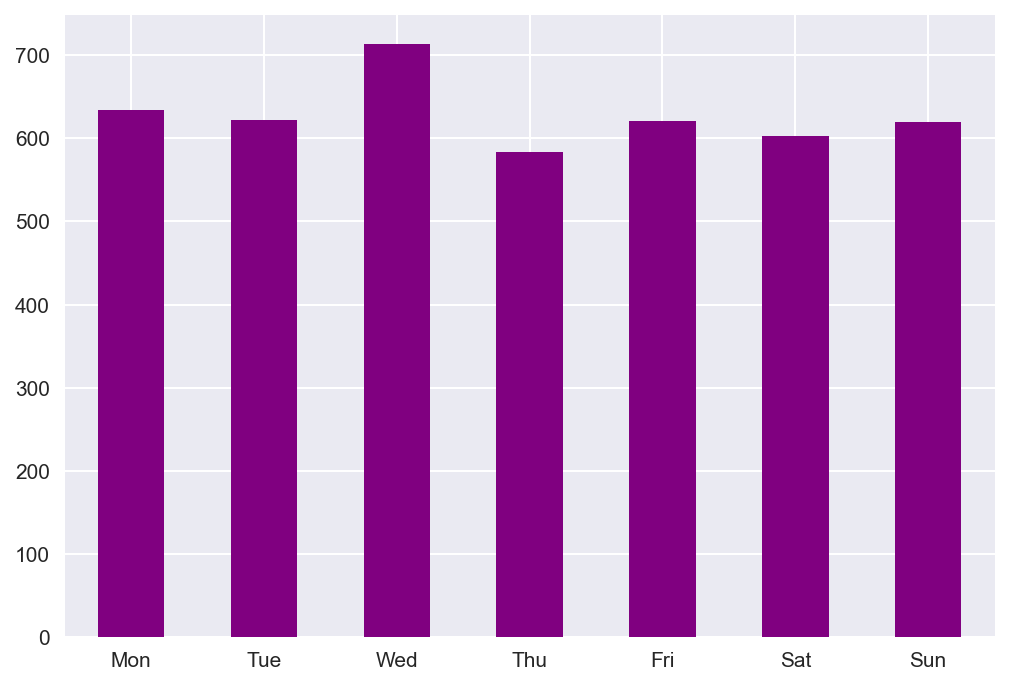

In [32]:
def count_videos_per_weekday(df):
    df['weekday'] = df['time'].dt.strftime('%a')
    total = len(df["weekday"])
    str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    return df["weekday"].value_counts()[str_week_days] # sort with custom index

videos_per_weekday = count_videos_per_weekday(df)
videos_per_weekday.plot.bar(color="purple", rot=0)

#    ####___UNFINISHED CODE BELOW___####

# Compare two subsets

In [33]:
# start_date = "2022-09-01"
# end_date = "2022-09-30"
# df = select_by_date_interval(df, start=start_date)
# df = df.loc[df["app"] == "YouTube Music"] # if you wanna work only with YT Music data
interval_1_start = "2022-09-01"
interval_1_end = "2022-10-01"
first_subset = select_by_date_interval(df, start=interval_1_start, end=interval_1_end)

interval_2_start = "2022-10-01"
interval_2_end = "2022-11-01"
second_subset = select_by_date_interval(df, start=interval_2_start, end=interval_2_end)

### See how you used YT per day of week in first subset vs second subset

In [34]:
weekday_compare_subsets = pd.DataFrame({"first_subset": count_videos_per_weekday(first_subset),
                                        "second_subset": count_videos_per_weekday(second_subset)})
weekday_compare_subsets.plot.bar(rot=0)

KeyError: "None of [Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype='object')] are in the [index]"

### Compare how you used YT daily

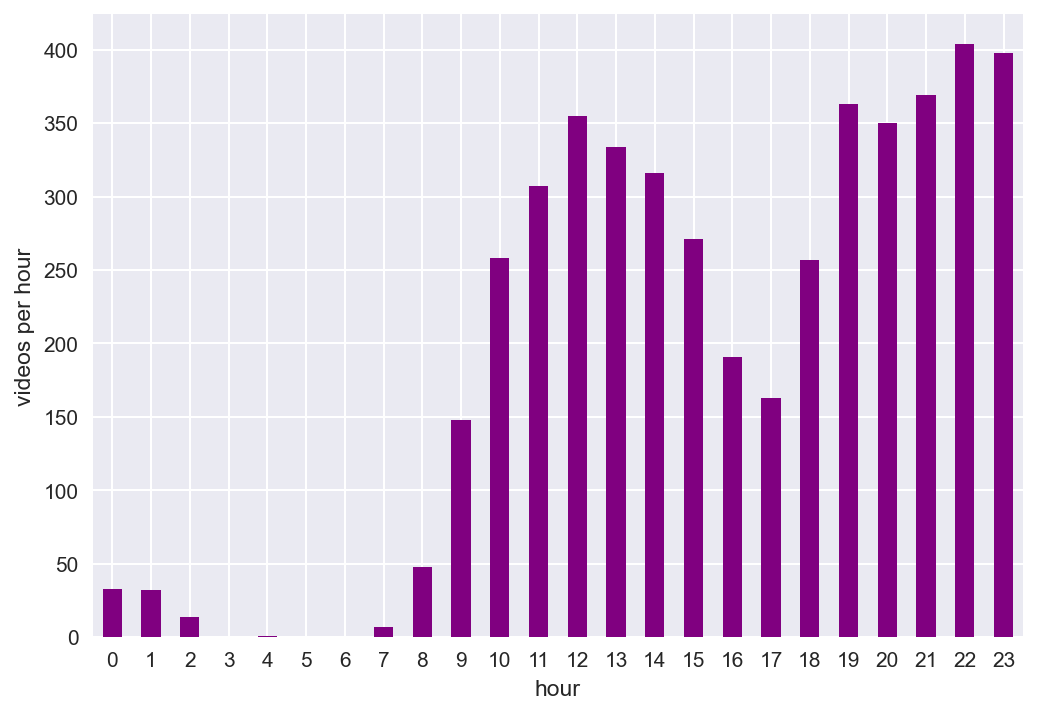

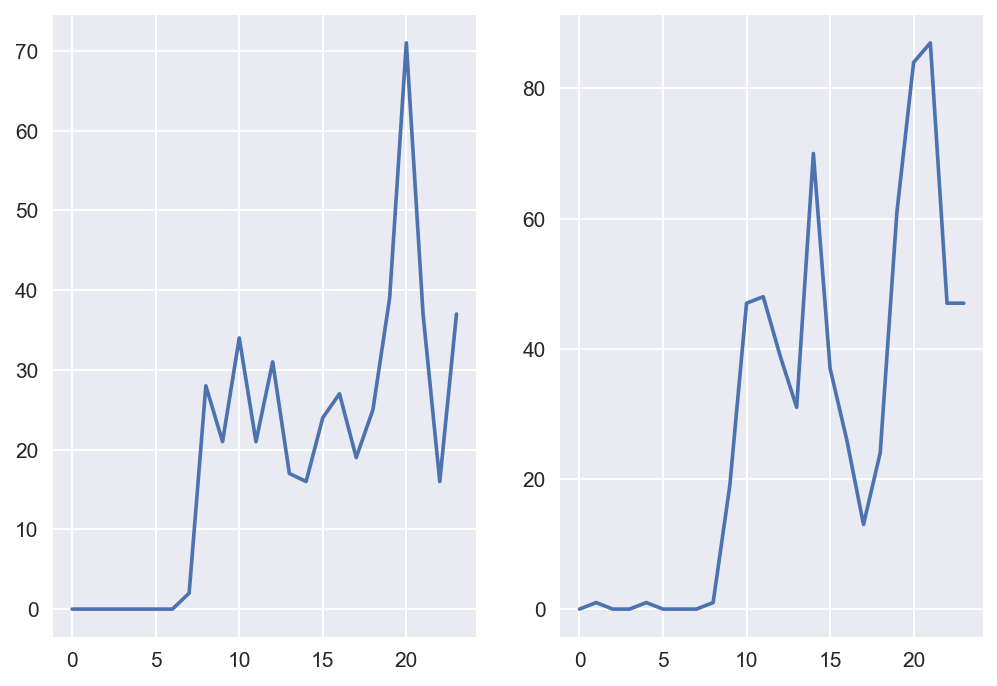

In [ ]:
h_bar_plot(df)
# should i normalize these series to 0 and 1?
daily_1 = get_videos_per_h(first_subset)
daily_2 = get_videos_per_h(second_subset)
daily_1

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(daily_1)
axes[1].plot(daily_2)